In [1]:
import numpy as np
import pandas as pd
import pickle


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:\Data\PU\Semester_3\MinorProject\cardio_train.csv",sep=';')

df

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0        988  22469       1     155    69.0    130     80            2     2   
1        989  14648       1     163    71.0    110     70            1     1   
2        990  21901       1     165    70.0    120     80            1     1   
3        991  14549       2     165    85.0    120     80            1     1   
4        992  23393       1     155    62.0    120     80            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69296  99993  19240       2     168    76.0    120     80            1     1   
69297  99995  22601       1     158   126.0    140     90            2     2   
69298  99996  19066       2     183   105.0    180     90            3     1   
69299  99998  22431       1     163    72.0    135     80            1     2   
69300  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       1       0  
3          1     1       1       0  
4          0     0       1       0  
...      ...   ...     ...     ...  
69296      1     0       1       0  
69297      0     0       1       1  
69298      0     1       0       1  
69299      0     0       0       1  
69300      0     0       1       0  

[69301 rows x 13 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
df.describe()

id           age        gender        height        weight  \
count  69301.000000  69301.000000  69301.000000  69301.000000  69301.000000   
mean   50471.480397  19468.786280      1.349519    164.362217     74.203027   
std    28563.100347   2467.261818      0.476821      8.205337     14.383469   
min      988.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25745.000000  17664.000000      1.000000    159.000000     65.000000   
50%    50494.000000  19704.000000      1.000000    165.000000     72.000000   
75%    75150.000000  21326.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  69301.000000  69301.000000  69301.000000  69301.000000  69301.000000   
mean     128.829584     96.650092      1.366806      1.226447      0.088051   
std      154.775805    189.096240      0.680270      0.572246      0.283371   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  69301.000000  69301.000000  69301.000000  
mean       0.053881      0.803986      0.499589  
std        0.225784      0.396982      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

In [5]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
plt.figure(figsize=(20,10))
plotnumber=1

for column in df:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [9]:
plt.figure(figsize=(20,10))
plotnumber=1

for column in df:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [10]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [11]:
q1 = df.quantile(0.25)

q3 = df.quantile(0.75)

iqr = q3 - q1

In [12]:
age_min = (q1.age - (1.5 * iqr.age))

age_min

12171.0

In [13]:
index = np.where(df['age'] < age_min)

index

(array([ 5520, 21644, 29967, 55206], dtype=int64),)

In [14]:
df = df.drop(df.index[index])

df.shape

(69297, 13)

In [15]:
age_max = (q3.age + (1.5 * iqr.age))

age_max

26819.0

In [16]:
index = np.where(df['age'] > age_max)

index

(array([], dtype=int64),)

In [17]:
gender_min = (q1.gender - (1.5 * iqr.gender))

gender_min

-0.5

In [18]:
index = np.where(df['gender'] < gender_min)

index

(array([], dtype=int64),)

In [19]:
gender_max = (q3.gender + (1.5 * iqr.gender))

gender_max

3.5

In [20]:
index = np.where(df['gender'] > gender_max)

index

(array([], dtype=int64),)

In [21]:
height_min = (q1.height - (1.5 * iqr.height))

height_min

142.5

In [22]:
index = np.where(df['height'] < height_min)

index

(array([   82,   349,  1713,  1964,  2245,  2433,  2509,  2721,  3036,
         3053,  3513,  4405,  4627,  5075,  5454,  5603,  6121,  6297,
         6358,  6416,  6605,  6898,  7471,  7977,  8060,  8431,  8584,
         8903,  9076,  9395,  9416,  9867, 10483, 10530, 11735, 12070,
        12280, 12329, 12495, 12565, 12748, 13170, 13252, 13373, 13591,
        13623, 13710, 14321, 14467, 14666, 14921, 15320, 15977, 15999,
        16374, 16577, 16616, 17288, 17362, 17392, 18477, 18721, 18972,
        19328, 19446, 19525, 21539, 21553, 21822, 21841, 22022, 22071,
        22117, 22137, 22323, 22994, 23076, 23212, 23305, 23567, 24278,
        24335, 25308, 25407, 26051, 26230, 26419, 26683, 26902, 27398,
        27747, 27812, 28036, 28041, 28116, 28196, 28274, 28456, 28866,
        29034, 29039, 29193, 29578, 29592, 29626, 29640, 30205, 30340,
        30440, 30718, 30955, 31216, 31396, 31426, 31887, 32177, 32832,
        32905, 33467, 33539, 33574, 33576, 33586, 33662, 34158, 34378,
      

In [23]:
df = df.drop(df.index[index])

df.shape

(69049, 13)

In [24]:
height_max = (q3.height + (1.5 * iqr.height))

height_max

186.5

In [25]:
index = np.where(df['height'] > height_max)

index

(array([  327,   416,   718,  1459,  1502,  1761,  1977,  2180,  2506,
         2531,  2695,  2914,  2922,  3198,  3771,  4116,  4201,  4291,
         4300,  4347,  4551,  4759,  4836,  4875,  4911,  5039,  5085,
         5242,  5342,  5628,  5770,  5843,  5887,  6014,  6134,  6543,
         7802,  8172,  8177,  8734,  9055, 10138, 10293, 10714, 10743,
        10974, 11170, 11273, 11281, 11437, 11998, 12128, 12204, 12422,
        12595, 12911, 13808, 13973, 14179, 14428, 14803, 14918, 15260,
        15473, 16055, 16181, 16884, 17088, 17165, 17191, 17228, 17273,
        17612, 17992, 18672, 19308, 19602, 19895, 19910, 20278, 20862,
        20918, 21055, 21486, 21818, 21902, 22128, 22337, 22538, 22607,
        22862, 22942, 22996, 23074, 23915, 23944, 24048, 24138, 24275,
        24385, 24392, 24569, 25635, 25823, 25880, 26397, 26821, 27022,
        27050, 27234, 27485, 28195, 28289, 28347, 28500, 28716, 28980,
        29324, 29435, 29477, 29739, 29862, 29894, 29991, 30545, 30776,
      

In [26]:
df = df.drop(df.index[index])

df.shape

(68782, 13)

In [27]:
weight_min = (q1.weight - (1.5 * iqr.weight))

weight_min

39.5

In [28]:
index = np.where(df['weight'] < weight_min)

index

(array([ 5055,  9675,  9854, 11096, 13917, 15506, 16087, 17726, 18745,
        21167, 24314, 25915, 28419, 28574, 31143, 32522, 32554, 32858,
        32861, 33313, 33358, 34339, 37419, 37745, 39600, 40337, 40884,
        43110, 43589, 47018, 47550, 50332, 50464, 52853, 53587, 54238,
        54750, 55796, 56732, 57071, 59039, 59545, 61946, 63897, 64462],
       dtype=int64),)

In [30]:
df = df.drop(df.index[index])

df.shape

(68737, 13)

In [31]:
weight_max = (q3.weight + (1.5 * iqr.weight))

weight_max

107.5

In [32]:
index = np.where(df['weight'] > weight_max)

index

(array([   39,    41,    52, ..., 68684, 68718, 68733], dtype=int64),)

In [33]:
df = df.drop(df.index[index])

df.shape

(67040, 13)

In [34]:
ap_hi_min = (q1.ap_hi - (1.5 * iqr.ap_hi))

ap_hi_min

90.0

In [35]:
index = np.where(df['ap_hi'] < ap_hi_min)

index

(array([  219,   270,   869,   894,  1034,  1419,  1669,  1761,  1843,
         2082,  2212,  2648,  2650,  2820,  2877,  3024,  3035,  3047,
         3092,  3135,  3457,  3521,  3556,  3638,  3750,  3763,  3774,
         3783,  3852,  3993,  4102,  4142,  4376,  4529,  4846,  4893,
         5674,  6170,  6456,  6586,  6785,  7023,  7211,  7345,  7413,
         7485,  7808,  7988,  8317,  8330,  8479,  8753,  8910,  9236,
         9710, 10030, 10039, 10081, 10125, 10422, 10541, 10755, 10909,
        12089, 12575, 12607, 12653, 12777, 13014, 13152, 13328, 13373,
        13616, 14536, 14842, 15152, 15288, 15436, 16035, 16112, 16308,
        16641, 16696, 16706, 16854, 17265, 17617, 17781, 18093, 18183,
        18891, 19225, 19377, 19380, 19460, 19568, 19597, 19632, 20095,
        20724, 21145, 21298, 21445, 22286, 22562, 22991, 23095, 23106,
        23115, 23229, 23261, 23377, 23400, 23655, 23771, 23975, 24300,
        24327, 24989, 25008, 25122, 25473, 25847, 25966, 26468, 26531,
      

In [36]:
df = df.drop(df.index[index])

df.shape

(66734, 13)

In [37]:
ap_hi_max = (q3.ap_hi + (1.5 * iqr.ap_hi))

ap_hi_max

170.0

In [38]:
index = np.where(df['ap_hi'] > ap_hi_max)

index

(array([  146,   255,   297,   601,   663,   703,   785,   895,   964,
         1008,  1055,  1066,  1132,  1179,  1206,  1219,  1265,  1435,
         1485,  1519,  1600,  1613,  1796,  1799,  1850,  1954,  1993,
         2025,  2028,  2102,  2115,  2122,  2145,  2241,  2561,  2883,
         2932,  2953,  2989,  3006,  3050,  3148,  3202,  3260,  3575,
         3689,  3794,  3855,  3901,  3917,  3946,  3953,  4092,  4108,
         4109,  4197,  4300,  4385,  4470,  4556,  4575,  4779,  4810,
         4995,  4998,  5011,  5029,  5093,  5122,  5135,  5194,  5231,
         5284,  5328,  5378,  5403,  5487,  5703,  5761,  5891,  5938,
         5947,  6093,  6102,  6111,  6310,  6327,  6360,  6385,  6399,
         6540,  6582,  6636,  6661,  6666,  6784,  6797,  6878,  6942,
         6993,  7069,  7402,  7414,  7513,  7529,  7843,  7891,  7910,
         7914,  8157,  8237,  8396,  8422,  8438,  8475,  8520,  8528,
         8531,  8545,  8629,  8729,  8820,  8901,  8910,  9031,  9156,
      

In [39]:
df = df.drop(df.index[index])

df.shape

(65747, 13)

In [40]:
ap_lo_min = (q1.ap_lo - (1.5 * iqr.ap_lo))

ap_lo_min

65.0

In [41]:
index = np.where(df['ap_lo'] < ap_lo_min)

index

(array([   28,    56,   132, ..., 65684, 65689, 65728], dtype=int64),)

In [42]:
df = df.drop(df.index[index])

df.shape

(62996, 13)

In [43]:
ap_lo_max = (q3.ap_lo + (1.5 * iqr.ap_lo))

ap_lo_max

105.0

In [44]:
index = np.where(df['ap_lo'] > ap_lo_max)

index

(array([   20,    70,    88, ..., 62891, 62933, 62967], dtype=int64),)

In [45]:
df = df.drop(df.index[index])

df.shape

(61881, 13)

In [48]:
cholesterol_min = (q1.cholesterol - (1.5 * iqr.cholesterol))

cholesterol_min

-0.5

In [49]:
index = np.where(df['cholesterol'] < cholesterol_min)

index

(array([], dtype=int64),)

In [50]:
cholesterol_max = (q3.cholesterol + (1.5 * iqr.cholesterol))

cholesterol_max

3.5

In [51]:
index = np.where(df['cholesterol'] > cholesterol_max)

index

(array([], dtype=int64),)

In [52]:
gluc_min = (q1.gluc - (1.5 * iqr.gluc))

gluc_min

1.0

In [53]:
index = np.where(df['gluc'] < gluc_min)

index

(array([], dtype=int64),)

In [54]:
gluc_max = (q3.gluc + (1.5 * iqr.gluc))

gluc_max

1.0

In [55]:
index = np.where(df['gluc'] > gluc_max)

index

(array([    0,    10,    13, ..., 61865, 61874, 61879], dtype=int64),)

In [56]:
df = df.drop(df.index[index])

df.shape

(52879, 13)

In [57]:
smoke_min = (q1.smoke - (1.5 * iqr.smoke))

smoke_min

0.0

In [58]:
index = np.where(df['smoke'] < smoke_min)

index

(array([], dtype=int64),)

In [59]:
smoke_max = (q3.smoke + (1.5 * iqr.smoke))

smoke_max

0.0

In [60]:
index = np.where(df['smoke'] > smoke_max)

index

(array([    2,    25,    26, ..., 52846, 52858, 52877], dtype=int64),)

In [61]:
df = df.drop(df.index[index])

df.shape

(48292, 13)

In [62]:
alco_min = (q1.alco - (1.5 * iqr.alco))

alco_min

0.0

In [63]:
index = np.where(df['alco'] > alco_min)

index

(array([   58,    81,   170, ..., 48241, 48279, 48282], dtype=int64),)

In [64]:
df = df.drop(df.index[index])

df.shape

(46985, 13)

In [65]:
alco_max = (q3.alco + (1.5 * iqr.alco))

alco_max

0.0

In [66]:
index = np.where(df['alco'] > alco_max)

index

(array([], dtype=int64),)

In [67]:
active_min = (q1.active - (1.5 * iqr.active))

active_min

1.0

In [68]:
index = np.where(df['active'] < active_min)

index

(array([   14,    18,    33, ..., 46964, 46965, 46967], dtype=int64),)

In [69]:
df  =df.drop(df.index[index])

df.shape

(37666, 13)

In [70]:
active_max = (q3.active + (1.5 * iqr.active))

active_max

1.0

In [71]:
index = np.where(df['active'] > active_max)

index

(array([], dtype=int64),)

In [72]:
plt.figure(figsize=(20,10))
plotnumber=1

for column in df:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [73]:
x = df.drop(columns='cardio')

y = df['cardio']

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [102]:
pickle.dump(scaler,open('scaler.pkl','wb'))

In [77]:
x_scaled

array([[-1.73426951, -1.95191915, -0.64846035, ...,  0.        ,
         0.        ,  0.        ],
       [-1.73423448,  1.00262887, -0.64846035, ...,  0.        ,
         0.        ,  0.        ],
       [-1.73416443,  1.61040298, -0.64846035, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.73324536,  0.10563249, -0.64846035, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.73328038,  0.66574603, -0.64846035, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.73352556,  0.4482183 , -0.64846035, ...,  0.        ,
         0.        ,  0.        ]])

In [78]:
x_scaled.shape[1]

12

In [79]:
# checking multicollinearity using vif

# from statsmodels.stats.outliers_influence import variance_inflation_factor 

# vif = pd.DataFrame()

# vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

# vif['features'] = x.columns

# vif

# if values of all columns come less than 5, we need not to delete any column

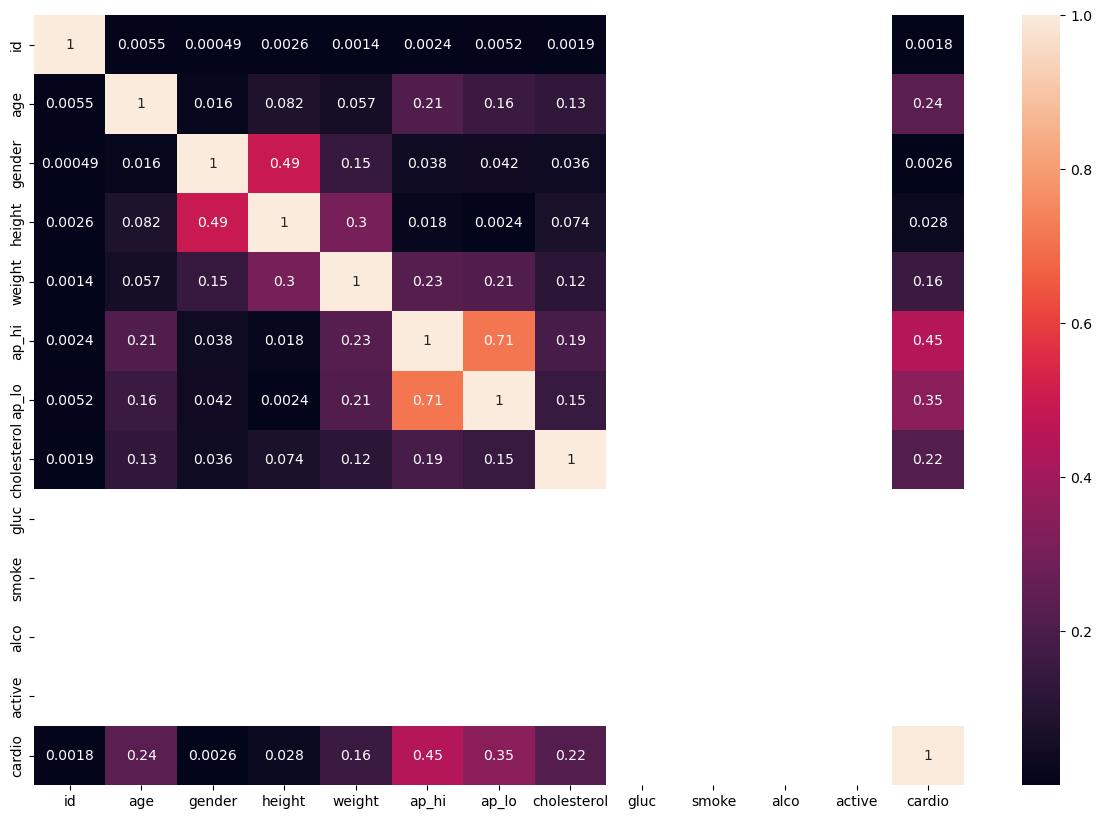

In [80]:
df_corr = df.corr().abs()

plt.figure(figsize=(15,10))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10})
plt.show()

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25)

In [83]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
lr = LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [86]:
lr_pred = lr.predict(x_test)

In [87]:
lr_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [88]:
accuracy = accuracy_score(y_test,lr_pred)

accuracy

0.7287883614739301

In [89]:
confusion_matrix(y_test,lr_pred)

array([[4078,  872],
       [1682, 2785]], dtype=int64)

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

dt_pred = dt.predict(x_test)

In [92]:
accuracy = accuracy_score(y_test,dt_pred)

accuracy

0.6350217691409153

In [93]:
confusion_matrix(y_test,dt_pred)

array([[3219, 1731],
       [1706, 2761]], dtype=int64)

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
rf = RandomForestClassifier()

rf.fit(x_train,y_train)

rf_pred = rf.predict(x_test)

In [96]:
accuracy = accuracy_score(y_test,rf_pred)

accuracy

0.719443559520017

In [97]:
confusion_matrix(y_test,rf_pred)

array([[3818, 1132],
       [1510, 2957]], dtype=int64)

In [98]:
pickle.dump(lr,open('LR_CardioML.pkl','wb'))

In [99]:
pickle.dump(dt,open('DT_CardioML.pkl','wb'))

In [100]:
pickle.dump(rf,open('RF_CardioML.pkl','wb'))

In [101]:
 #type(lr)
# type(scaler)